<a href="https://colab.research.google.com/github/josware/mcc_tareas/blob/master/Copy_of_Tarea_6_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistemas Inteligencia Artificial: Deep Learning**
## **Tarea 6 Covid-19: Comparacióón de Modelos**

---
#### A00354512 Josue Emanuel Gómez Carrillo
#### A00540988 Luis Francisco González Rodríguez
#### A00354860 Anna Karen Casillas Garcia
---

# 1. El presente ejercicio está basado en el siguiente artículo: https://www.frontiersin.org/articles/10.3389/fpubh.2020.00357/full El objetivo es determinar si una fallece o no a partir de un historial clínico. Utiliza en esta tarea el archivo “train.csv” que encontrarás en el repositorio GitHub dado en el artículo. Los autores separaron previamente en dicho archivo los datos cuya variable de salida “death” no tiene un valor nulo.

In [ ]:
import numpy as np    # biblioteca para el manejo de vectores y matrices en python.
import pandas as pd   # biblioteca para el manejo de datos y tablas.
import matplotlib.pyplot as plt   # biblioteca para visualización de datos.
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

encoder = preprocessing.LabelEncoder()

#Descargar Datasets
#!curl -O https://raw.githubusercontent.com/Atharva-Peshkar/Covid-19-Patient-Health-Analytics/archive/master.zip
!curl -O https://raw.githubusercontent.com/Fragonz/MCC/master/Tarea6-Covid_SisInt/train.csv

#path_project_zip = "/content/master.zip"
path_train = "/content/train.csv"

#with zip.ZipFile(path_project_zip,"r") as zip_ref:
#  zip_ref.extractall()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15940  100 15940    0     0   235k      0 --:--:-- --:--:-- --:--:--  235k


In [ ]:
# Carga de Data sets
ds_train = pd.read_csv(path_train)


## **A) Realiza un análisis descriptivo y gráfico de los datos.**



Iniciamos con la Tabla 1 original que resume el contenido de los features en Inglés; para conveiencia y consitencia un resumen en español

*   id - id del Paciente
*   location - Ubicación del paciente
*   country - País de procedencia
*   gender - Genero del paciente
*   age - Edad del paciente
*   sym_on - Inicio de sintomas del paciente
*   hosp_vis - Fecha de visita al hospial del paciente
*   vis_wuhan - Si el paciente visitó Wuhan
*   from_wuhan - Es el paciente de Wuhan
*   death - El paciente murió a causa de Covid 19
*   recov - El paciente se recuperó de Covid 19
*   symptom1 - Indice de sintomas del 1 - 6
*   symptom2 - Indice de sintomas del 1 - 6
*   symptom3 - Indice de sintomas del 1 - 6
*   symptom4 - Indice de sintomas del 1 - 6
*   symptom5 - Indice de sintomas del 1 - 6
*   symptom6 - Indice de sintomas del 1 - 6

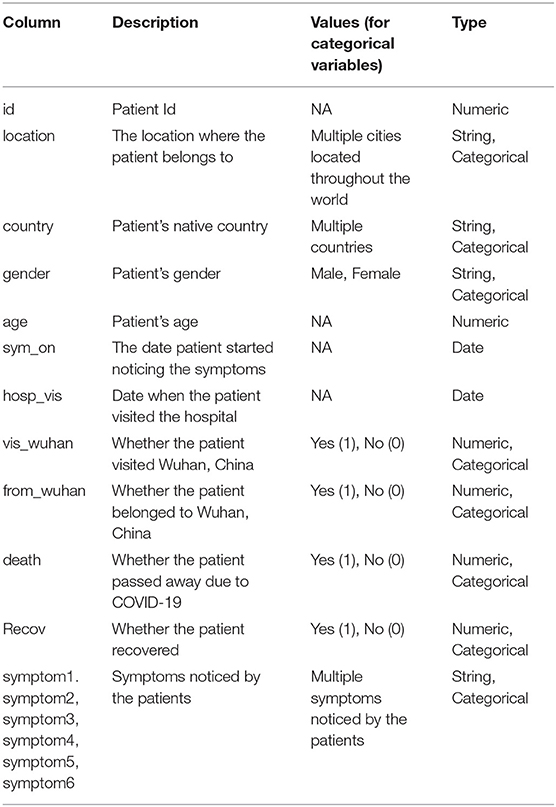

In [ ]:
# Tamaño de Data Set
ds_train.shape

(222, 16)

In [ ]:
ds_train.head()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,49,"Wuhan, Hubei",China,male,61.0,12/20/2019,12/27/2019,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,50,"Wuhan, Hubei",China,male,69.0,12/30/2019,1/3/2020,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,51,"Wuhan, Hubei",China,male,89.0,NaN,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,52,"Wuhan, Hubei",China,male,89.0,1/13/2020,1/13/2020,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,53,"Wuhan, Hubei",China,male,66.0,1/10/2020,1/16/2020,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds_train.describe()

,id,age,vis_wuhan,from_wuhan,death,symptom4,symptom5,symptom6
count,222.000000,203.000000,222.000000,222.000000,222.000000,0.0,0.0,0.0
mean,480.968468,49.747537,0.157658,0.283784,0.283784,NaN,NaN,NaN
std,262.073776,20.462520,0.365243,0.451852,0.451852,NaN,NaN,NaN
min,49.000000,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,321.250000,35.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,479.500000,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,604.000000,65.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN
max,1037.000000,89.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN


In [ ]:
ds_numeric = ds_train[["id", "age", "vis_wuhan", "from_wuhan", "death"]]

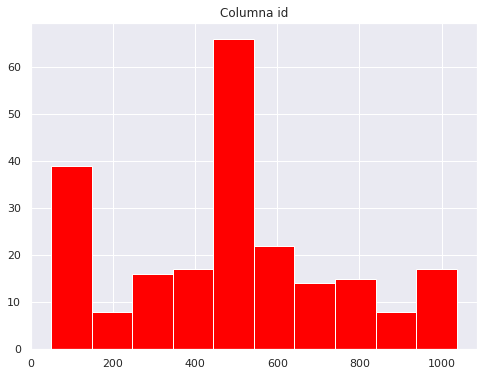

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


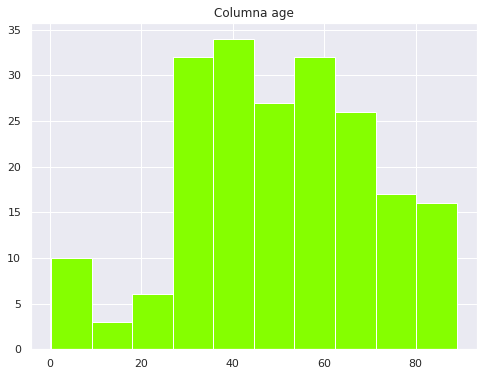

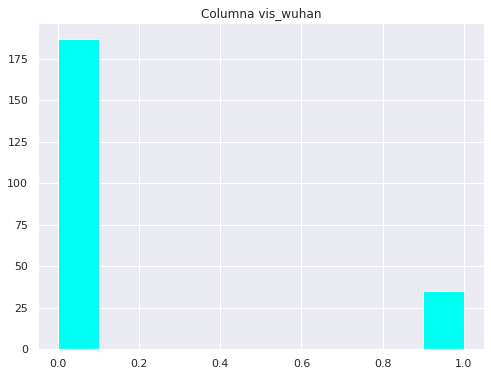

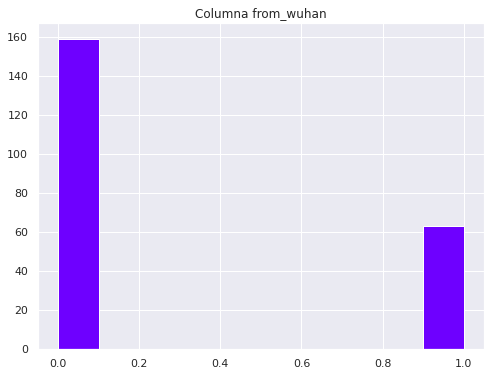

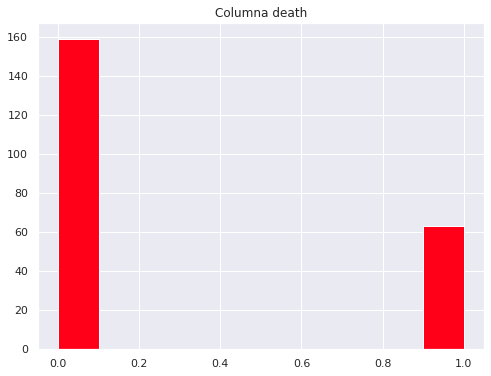

In [ ]:
import seaborn as sns
def plotHist(strColumn="id",iBins=10,colorIndex=0,dataframe=ds_numeric):
  sns.set(rc={'figure.figsize':(8,6)})
  plt.hist(np.array(dataframe[strColumn]), bins=iBins, color=cmap(colorIndex))
  plt.title('Columna '+strColumn)
  plt.show()

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

iBins = [10,10,10,10,10]
i = 0
cmap = get_cmap(len(iBins))
for s in ds_numeric.columns:
  plotHist(s,iBins[i],i)
  i += 1

## **B) Aplica el tratamiento a los datos con valores NA indicado por los autores. Indica el cada factor la cantidad de dichos datos perdidos.**

In [ ]:
ds_train = ds_train.fillna(np.nan,axis=0)

In [ ]:
print("Number of Nans:",ds_train.isna().sum())

Number of Nans: id              0
location        0
country         0
gender         11
age            19
sym_on        103
hosp_vis      103
vis_wuhan       0
from_wuhan      0
death           0
symptom1      171
symptom2      200
symptom3      209
symptom4      222
symptom5      222
symptom6      222
dtype: int64


In [ ]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          222 non-null    int64  
 1   location    222 non-null    object 
 2   country     222 non-null    object 
 3   gender      211 non-null    object 
 4   age         203 non-null    float64
 5   sym_on      119 non-null    object 
 6   hosp_vis    119 non-null    object 
 7   vis_wuhan   222 non-null    int64  
 8   from_wuhan  222 non-null    int64  
 9   death       222 non-null    int64  
 10  symptom1    51 non-null     object 
 11  symptom2    22 non-null     object 
 12  symptom3    13 non-null     object 
 13  symptom4    0 non-null      float64
 14  symptom5    0 non-null      float64
 15  symptom6    0 non-null      float64
dtypes: float64(4), int64(4), object(8)
memory usage: 27.9+ KB


In [ ]:
ds_train['location'] = encoder.fit_transform(ds_train['location'].astype(str))
ds_train['country'] = encoder.fit_transform(ds_train['country'].astype(str))

In [ ]:
print("NAs Gender:",ds_train["gender"].isna().sum())
ds_train['gender'] = encoder.fit_transform(ds_train['gender'].astype(str))

NAs Gender: 11


In [ ]:
print("NAs Age:",ds_train["age"].isna().sum())
ds_train['age'] = ds_train['age'].fillna(value=ds_train['age'].mean())

NAs Age: 19


In [ ]:
print("NAs Sym_on:",ds_train["sym_on"].isna().sum())
ds_train['sym_on'] = pd.to_datetime(ds_train['sym_on'])
ds_train['sym_on']= ds_train['sym_on'].map(dt.datetime.toordinal)

NAs Sym_on: 103


In [ ]:
print("NAs hosp_vis:",ds_train["hosp_vis"].isna().sum())
ds_train['hosp_vis'] = pd.to_datetime(ds_train['hosp_vis'])
ds_train['hosp_vis']= ds_train['hosp_vis'].map(dt.datetime.toordinal)

NAs hosp_vis: 103


In [ ]:
print("NAs symptom1:",ds_train["symptom1"].isna().sum())
ds_train[['symptom1']] = encoder.fit_transform(ds_train['symptom1'].astype(str))

NAs symptom1: 171


In [ ]:
print("NAs symptom2:",ds_train["symptom2"].isna().sum())
ds_train[['symptom2']] = encoder.fit_transform(ds_train['symptom2'].astype(str))

NAs symptom2: 200


In [ ]:
print("NAs symptom3:",ds_train["symptom3"].isna().sum())
ds_train[['symptom3']] = encoder.fit_transform(ds_train['symptom3'].astype(str))

NAs symptom3: 209


In [ ]:
print("NAs symptom4:",ds_train["symptom4"].isna().sum())
ds_train[['symptom4']] = encoder.fit_transform(ds_train['symptom4'].astype(str))

NAs symptom4: 222


In [ ]:
print("NAs symptom5:",ds_train["symptom5"].isna().sum())
ds_train[['symptom5']] = encoder.fit_transform(ds_train['symptom5'].astype(str))

NAs symptom5: 222


In [ ]:
print("NAs symptom6:",ds_train["symptom6"].isna().sum())
ds_train[['symptom6']] = encoder.fit_transform(ds_train['symptom6'].astype(str))

NAs symptom6: 222


In [ ]:
print("Number of Nans:",ds_train.isna().sum())

Number of Nans: id            0
location      0
country       0
gender        0
age           0
sym_on        0
hosp_vis      0
vis_wuhan     0
from_wuhan    0
death         0
symptom1      0
symptom2      0
symptom3      0
symptom4      0
symptom5      0
symptom6      0
dtype: int64


In [ ]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          222 non-null    int64  
 1   location    222 non-null    int64  
 2   country     222 non-null    int64  
 3   gender      222 non-null    int64  
 4   age         222 non-null    float64
 5   sym_on      222 non-null    int64  
 6   hosp_vis    222 non-null    int64  
 7   vis_wuhan   222 non-null    int64  
 8   from_wuhan  222 non-null    int64  
 9   death       222 non-null    int64  
 10  symptom1    222 non-null    int64  
 11  symptom2    222 non-null    int64  
 12  symptom3    222 non-null    int64  
 13  symptom4    222 non-null    int64  
 14  symptom5    222 non-null    int64  
 15  symptom6    222 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 27.9 KB


In [ ]:
ds_train.head()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,49,38,2,1,61.0,737413,737420,0,1,1,9,9,11,0,0,0
1,50,38,2,1,69.0,737423,737427,0,1,1,9,9,11,0,0,0
2,51,38,2,1,89.0,1,1,0,1,1,9,9,11,0,0,0
3,52,38,2,1,89.0,737437,737437,0,1,1,9,9,11,0,0,0
4,53,38,2,1,66.0,737434,737440,0,1,1,9,9,11,0,0,0


In [ ]:
ds_train.describe()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.0,222.0,222.0
mean,480.968468,24.576577,9.581081,0.689189,49.747537,395298.882883,395300.599099,0.157658,0.283784,0.283784,8.022523,8.364865,10.657658,0.0,0.0,0.0
std,262.073776,10.135328,5.468147,0.561003,19.563145,368595.450553,368597.050813,0.365243,0.451852,0.451852,1.978261,2.072712,1.574661,0.0,0.0,0.0
min,49.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,321.250000,17.250000,5.000000,0.000000,36.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,9.000000,11.000000,0.0,0.0,0.0
50%,479.500000,27.000000,12.000000,1.000000,49.747537,737427.000000,737433.000000,0.000000,0.000000,0.000000,9.000000,9.000000,11.000000,0.0,0.0,0.0
75%,604.000000,29.750000,13.000000,1.000000,65.000000,737448.000000,737452.000000,0.000000,1.000000,1.000000,9.000000,9.000000,11.000000,0.0,0.0,0.0
max,1037.000000,39.000000,21.000000,2.000000,89.000000,737475.000000,737476.000000,1.000000,1.000000,1.000000,10.000000,9.000000,11.000000,0.0,0.0,0.0


## **C) Realiza la transformación de los factores “sym_on” y “hosp_vis” para conjuntarlas en una única variable que contabiliza el total de días desde que aparecieron los síntomas hasta que fueron al hospital.**

In [ ]:
ds_train['diff_sym_hos']= ds_train['hosp_vis'] - ds_train['sym_on']
ds_train = ds_train.drop(['sym_on','hosp_vis'],axis=1)

In [ ]:
ds_train.head()

,id,location,country,gender,age,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,49,38,2,1,61.0,0,1,1,9,9,11,0,0,0,7
1,50,38,2,1,69.0,0,1,1,9,9,11,0,0,0,4
2,51,38,2,1,89.0,0,1,1,9,9,11,0,0,0,0
3,52,38,2,1,89.0,0,1,1,9,9,11,0,0,0,0
4,53,38,2,1,66.0,0,1,1,9,9,11,0,0,0,6


In [ ]:
ds_train.describe()

,id,location,country,gender,age,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.0,222.0,222.0,222.000000
mean,480.968468,24.576577,9.581081,0.689189,49.747537,0.157658,0.283784,0.283784,8.022523,8.364865,10.657658,0.0,0.0,0.0,1.716216
std,262.073776,10.135328,5.468147,0.561003,19.563145,0.365243,0.451852,0.451852,1.978261,2.072712,1.574661,0.0,0.0,0.0,2.887891
min,49.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-1.000000
25%,321.250000,17.250000,5.000000,0.000000,36.000000,0.000000,0.000000,0.000000,9.000000,9.000000,11.000000,0.0,0.0,0.0,0.000000
50%,479.500000,27.000000,12.000000,1.000000,49.747537,0.000000,0.000000,0.000000,9.000000,9.000000,11.000000,0.0,0.0,0.0,0.000000
75%,604.000000,29.750000,13.000000,1.000000,65.000000,0.000000,1.000000,1.000000,9.000000,9.000000,11.000000,0.0,0.0,0.0,3.000000
max,1037.000000,39.000000,21.000000,2.000000,89.000000,1.000000,1.000000,1.000000,10.000000,9.000000,11.000000,0.0,0.0,0.0,15.000000


## **D) Realiza una partición aleatoria de 80% entrenamiento y 20% prueba. Es decir, usando los mismos porcentajes que los autores del artículo.**

In [ ]:
X = ds_train[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = ds_train['death']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0) #80-20%

In [ ]:
print(X_train.shape)
print(X_test.shape)

(177, 13)
(45, 13)


## **E) Investiga en qué consisten las siguientes clases de sklearn:**

### a) RandomizedSearchCV: https://scikitlearn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html



RandomizedSearchCV emplea una búsqueda de manera aleatoria para la selección de hiperparámetros utilizando un "ajuste" y "puntuación". 

Para estimar los paramentros utilizados en estos métodos se optimizan mediante una búsqueda de validación cruzada.

En n_iter se específica el numero de ajustes por parametro;A diferencia de lo usado en GridSearchCV, no se hace prueba de todos los valores para todos los parámetros, sino que se hace una muestra con un número fijo de configuraciones.

### b) GridSearchCV: https://scikitlearn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

GridSearchCV utiliza cross-validated grid-search para hacer una búsqueda exhaustiva de valores de parámetros especificados que van a aser especificados para un estimador. A diferencia de RandomizedSearchCV prueba todos los valores de parametros.

## **F) En este inciso deberás aplicar modelo de Regresión Logística de sklearn (https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html ) y la clase RandomizedSearchCV con el conjunto de datos de entrenamiento del 80% generado previamente. Para ello verás definir una malla de búsqueda que al menos incluya los siguientes hiperparámetors y rango de valores siguientes:**

### a) C: 10 valores.

c:float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

### b) penalty: L1, L2 y None.

Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

New in version 0.19: l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)

### c) Solver: lbfgs, saga. (NOTA: Investiga qué significan estos valores).

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

* ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

* ‘liblinear’ and ‘saga’ also handle L1 penalty

* ‘saga’ also supports ‘elasticnet’ penalty

* ‘liblinear’ does not support setting penalty='none'

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.



In [ ]:
# Create logistic regression
logistic = LogisticRegression()
# Create regularization hyperparameters
parameters = {'penalty':['l1', 'l2','none'],'C':[0.001,0.01,0.1,1,1.10,10,10.10,100,100.1,1000],'solver':['saga','lbfgs']}

### d) Aplica el modelo de Regresión Logística mediante una búsqueda aleatoria de los mejores valores de los hiperparámetros anteriores con RandomizedSearchCV con n_iter=30, cv=5, scoring=accuracy. (NOTA: Investiga qué significan estos valores).

**n_iter: int, default=10**

Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.

**cv:  int, cross-validation generator or an iterable, default=None**

Determines the cross-validation splitting strategy. Possible inputs for cv are:

* None, to use the default 5-fold cross validation,

* integer, to specify the number of folds in a (Stratified)KFold,

* CV splitter,

* An iterable yielding (train, test) splits as arrays of indices.

For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

**scoring:** **str, callable, list/tuple or dict, default=None**

A single str (see The scoring parameter: defining model evaluation rules) or a callable (see Defining your scoring strategy from metric functions) to evaluate the predictions on the test set.

For evaluating multiple metrics, either give a list of (unique) strings or a dict with names as keys and callables as values.

NOTE that when using custom scorers, each scorer should return a single value. Metric functions returning a list/array of values can be wrapped into multiple scorers that return one value each

In [ ]:
# run randomized search
random_search = RandomizedSearchCV(
        logistic, param_distributions=parameters,
        n_iter=30, cv=5,
        verbose=2, random_state=17,
        scoring=make_scorer(accuracy_score),n_jobs=-1,
        return_train_score=False)
    

In [ ]:
# Fit randomized search
best_model = random_search.fit(X_train,Y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# View best hyperparameters 
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])

Best Penalty: l2
Best C: 1
Best Solver: lbfgs


In [ ]:
best_model.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
best_model.best_score_

0.8873015873015871

### e) Reporta los mejores valores encontrados en los datos de prueba del 20% generados previamente, la matriz de confusión y las métricas accuracy precision, recall y f1-score.

In [ ]:
best_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
pred = np.array(best_model.predict(X_test))

recall = rs(Y_test,pred)
precision = ps(Y_test,pred)
f1 = fs(Y_test,pred)
ma = best_model.score(X_test,Y_test)

In [ ]:
print('### Evaluation metrics for test dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df = pd.DataFrame(Y_test)
pred_df['pred']=  pred
print(pred_df.head())

### Evaluation metrics for test dataset ###

Recall Score:  0.75
Precision Score:  1.0
F1 Score:  0.8571428571428571
Accuracy:  0.9333333333333333
     death  pred
130      0     0
203      0     0
170      1     0
66       0     0
181      0     0


In [ ]:
#Confusion Matrix
confusionMatrix = cm(Y_test, pred)
print(confusionMatrix)

[[33  0]
 [ 3  9]]


In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.9333333333333333

### f) Compara los resultados con los reportados por los autores del artículo con dicho modelo.

Comparando nuestros resultados con los de la [imagen](https://https://www.frontiersin.org/files/Articles/562169/fpubh-08-00357-HTML/image_m/fpubh-08-00357-g012.jpg) proporcionada por el articulo y en su investigacion, ellos obtuvieron los siguientes metricas en su modelo dde regresion logistica:

* Recall Score:  0.7272727272727273
* Precision Score:  0.6666666666666666
* F1 Score:  0.6956521739130435
* Accuracy:  0.8444444444444444

Nosotros obtuvimos mejores Metricas, por lo que podemos corroborar que en efecto RandomizedSearchCV nos ayudo a mejorar nuestro modelo obteniendo los mejores parametros para la regresion logistica:

* Recall Score:  0.75
* Precision Score:  1.0
* F1 Score:  0.8571428571428571
* Accuracy:  0.9333333333333333


## **G) En este inciso aplicarás ahora un árbol de decisión mediante la clase DecisionTreeClasifier de sklearn (https://scikitlearn. org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html ) y los mismos datos de entrenamiento y prueba generados previamente. Para ello verás definir una malla de búsqueda que al menos incluya los siguientes hiperparámetors y rango de valores siguientes:**

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### a) ccp_alpha: 10 valores.

In [ ]:
ccp_alpha = [0.0, 0.2, 0.5, 0.9, 1.0, 1.5, 2, 2.5, 3,3.5]

### b) Criterio: gini, entropy.

In [ ]:
criteria = ['gini', 'entropy']

### c) Max_depth: 6

In [ ]:
max_depth = [1,2,5,10,12]

### d) Min_samples_split: 6

In [ ]:
min_split = [10,20,25,30,45,50]

### e) Min_samples_leaf: 6

In [ ]:
min_leaf = [1,2,3,4,5,6]

In [ ]:
# Create regularization hyperparameters
parameters = {'ccp_alpha': ccp_alpha,'criterion':criteria, 
              'max_depth': max_depth,'min_samples_split': min_split,
              'min_samples_leaf':min_leaf}

### f) Aplica el modelo de Árbol de Decisión mediante una búsqueda aleatoria de los mejores valores de los hiperparámetros anteriores con RandomizedSearchCV con n_iter=100, cv=5, scoring=accuracy.

In [ ]:
# run randomized search
random_search = RandomizedSearchCV(
        estimator= tree, param_distributions=parameters,
        n_iter=100, cv=5,
        verbose=2, random_state=17,
        scoring=make_scorer(accuracy_score),n_jobs=-1,
        return_train_score=False)

In [ ]:
# Fit randomized search
best_model_tree = random_search.fit(X_train,Y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


In [ ]:
best_model_tree.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
# View best hyperparameters 
print('Best ccp_alpha:', best_model_tree.best_estimator_.get_params()['ccp_alpha'])
print('Best criterion:', best_model_tree.best_estimator_.get_params()['criterion'])
print('Best max_depth', best_model_tree.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf', best_model_tree.best_estimator_.get_params()['min_samples_leaf'])
print('Best min_samples_split', best_model_tree.best_estimator_.get_params()['min_samples_split'])

Best ccp_alpha: 0.0
Best criterion: gini
Best max_depth 5
Best min_samples_leaf 1
Best min_samples_split 10


In [ ]:
best_model_tree.best_score_

0.9095238095238095

### g) Reporta los mejores valores encontrados en los datos de prueba del 20% generados previamente, la matriz de confusión y las métricas accuracy precision, recall y f1-score.

In [ ]:
best_model_tree.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0])

In [ ]:
pred_tree = np.array(best_model_tree.predict(X_test))

recall = rs(Y_test,pred_tree)
precision = ps(Y_test,pred_tree)
f1 = fs(Y_test,pred_tree)
ma = best_model_tree.score(X_test,Y_test)

In [ ]:
print('### Evaluation metrics for test dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df = pd.DataFrame(Y_test)
pred_df['pred']=  pred_tree
print(pred_df.head())

### Evaluation metrics for test dataset ###

Recall Score:  0.75
Precision Score:  0.9
F1 Score:  0.8181818181818182
Accuracy:  0.9111111111111111
     death  pred
130      0     0
203      0     0
170      1     1
66       0     0
181      0     0


In [ ]:
#Confusion Matrix
confusionMatrix = cm(Y_test, pred_tree)
print(confusionMatrix)

[[32  1]
 [ 3  9]]


In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.9111111111111111

## **H) En este inciso usarás el método de Máquina de Vectores de Soporte (https://scikitlearn.org/stable/modules/generated/sklearn.svm.SVC.html ) y los mismos datos de entrenamiento y prueba generados previamente. Para ello verás definir una malla de búsqueda que al menos incluya los siguientes hiperparámetors y rango de valores siguientes:**

In [ ]:
svc = SVC()

### a) C: 10 valores.

In [ ]:
c_values = [1,2,3,4,5,6,7,8,9,10]

### b) Kernel: linear, poly, rbf, sigmoid.

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

### c) Degree: 6 valores.

In [ ]:
degree = [1,2,3,4,5,6]

### d) Gamma: scale, auto.

In [ ]:
gamma = ['scale', 'auto']

In [ ]:
# Create regularization hyperparameters
parameters = {'C': c_values,'kernel':kernels, 
              'degree': degree,'gamma': gamma}

### e) Aplica el modelo SVM mediante una búsqueda aleatoria de los mejores valores de los hiperparámetros anteriores con RandomizedSearchCV con n_iter=100, cv=5, scoring=accuracy.

In [ ]:
# run randomized search
random_search = RandomizedSearchCV(
        estimator= svc, param_distributions=parameters,
        n_iter=100, cv=5,
        verbose=2, random_state=17, 
        scoring=make_scorer(accuracy_score),
        return_train_score=False)

In [ ]:
# Fit randomized search
best_model_svc = random_search.fit(X_train,Y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] kernel=rbf, gamma=scale, degree=4, C=3 ..........................
[CV] ........... kernel=rbf, gamma=scale, degree=4, C=3, total=   0.0s
[CV] kernel=rbf, gamma=scale, degree=4, C=3 ..........................
[CV] ........... kernel=rbf, gamma=scale, degree=4, C=3, total=   0.0s
[CV] kernel=rbf, gamma=scale, degree=4, C=3 ..........................
[CV] ........... kernel=rbf, gamma=scale, degree=4, C=3, total=   0.0s
[CV] kernel=rbf, gamma=scale, degree=4, C=3 ..........................
[CV] ........... kernel=rbf, gamma=scale, degree=4, C=3, total=   0.0s
[CV] kernel=rbf, gamma=scale, degree=4, C=3 ..........................
[CV] ........... kernel=rbf, gamma=scale, degree=4, C=3, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=4, C=1 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... kernel=poly, gamma=auto, degree=4, C=1, total=  34.2s
[CV] kernel=poly, gamma=auto, degree=4, C=1 ..........................
[CV] ........... kernel=poly, gamma=auto, degree=4, C=1, total=   0.8s
[CV] kernel=poly, gamma=auto, degree=4, C=1 ..........................
[CV] ........... kernel=poly, gamma=auto, degree=4, C=1, total= 1.5min
[CV] kernel=poly, gamma=auto, degree=4, C=1 ..........................
[CV] ........... kernel=poly, gamma=auto, degree=4, C=1, total=  49.1s
[CV] kernel=poly, gamma=auto, degree=4, C=1 ..........................
[CV] ........... kernel=poly, gamma=auto, degree=4, C=1, total= 1.6min
[CV] kernel=poly, gamma=auto, degree=2, C=7 ..........................
[CV] ........... kernel=poly, gamma=auto, degree=2, C=7, total=   2.0s
[CV] kernel=poly, gamma=auto, degree=2, C=7 ..........................
[CV] ........... kernel=poly, gamma=auto, degree=2, C=7, total=   0.2s
[CV] kernel=poly, gamma=auto, degree=2, C=7 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 15.7min finished


In [ ]:
best_model_svc.best_params_

{'C': 9, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
# View best hyperparameters 
print('Best C:', best_model_svc.best_estimator_.get_params()['C'])
print('Best kernel:', best_model_svc.best_estimator_.get_params()['kernel'])
print('Best gamma', best_model_svc.best_estimator_.get_params()['gamma'])
print('Best Degree', best_model_svc.best_estimator_.get_params()['degree'])

Best C: 9
Best kernel: poly
Best gamma scale
Best Degree 5


In [ ]:
best_model_svc.best_score_

0.8753968253968253

### f) Reporta los mejores valores encontrados en los datos de prueba del 20% generados previamente, la matriz de confusión y las métricas accuracy, precision, recall y f1-score.


In [ ]:
best_model_svc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
pred_svc = np.array(best_model_svc.predict(X_test))

recall = rs(Y_test,pred_svc)
precision = ps(Y_test,pred_svc)
f1 = fs(Y_test,pred_svc)
ma = best_model_svc.score(X_test,Y_test)

In [ ]:
print('### Evaluation metrics for test dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df = pd.DataFrame(Y_test)
pred_df['pred']=  pred_svc
print(pred_df.head())

### Evaluation metrics for test dataset ###

Recall Score:  0.75
Precision Score:  1.0
F1 Score:  0.8571428571428571
Accuracy:  0.9333333333333333
     death  pred
130      0     0
203      0     0
170      1     0
66       0     0
181      0     0


In [ ]:
#Confusion Matrix
confusionMatrix = cm(Y_test, pred_svc)
print(confusionMatrix)

[[33  0]
 [ 3  9]]


In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.9333333333333333

### g) Compara los resultados con los reportados por los autores del artículo con dicho modelo.

## **I) En este inciso usarás el método Bayes Ingenuo Gaussiano (https://scikitlearn. org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html ) y los mismos datos de entrenamiento y prueba generados previamente.**

In [ ]:
gaussian_model = GaussianNB()

In [ ]:
#fit
gaussian_model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### a) Reporta los mejores valores encontrados en los datos de prueba del 20% generados previamente, la matriz de confusión y las métricas accuracy, precision, recall y f1-score.

In [ ]:
pred_gauss = np.array(gaussian_model.predict(X_test))

recall = rs(Y_test,pred_gauss)
precision = ps(Y_test,pred_gauss)
f1 = fs(Y_test,pred_gauss)
ma = gaussian_model.score(X_test,Y_test)

In [ ]:
print('### Evaluation metrics for test dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df = pd.DataFrame(Y_test)
pred_df['pred']=  pred_gauss
print(pred_df.head())

### Evaluation metrics for test dataset ###

Recall Score:  0.9166666666666666
Precision Score:  0.34375
F1 Score:  0.5
Accuracy:  0.5111111111111111
     death  pred
130      0     1
203      0     0
170      1     1
66       0     0
181      0     1


In [ ]:
#Confusion Matrix
confusionMatrix = cm(Y_test, pred_gauss)
print(confusionMatrix)

[[12 21]
 [ 1 11]]


In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.5111111111111111

### b) Compara los resultados con los reportados por los autores del artículo con dicho modelo.

### c) ¿Por qué no fue necesario aplicar RandomizedSearchCV en este caso?

## **J) En este inciso aplicarás el método de Random Forest (https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html ) y los mismos datos de entrenamiento y prueba generados previamente. Para ello verás definir una malla de búsqueda que al menos incluya los siguientes hiperparámetors y rango de valores siguientes:**

In [ ]:
forest = RandomForestClassifier()

### a) bootstrap: True, False.

In [ ]:
bootstrap = [True,False]

### b) ccp_alpha: 10 valores.

In [ ]:
ccp_alpha = [0.0, 0.2, 0.5, 0.9, 1.0, 1.5, 2, 2.5, 3,3.5]

### c. Criterio: gini, entropy.

In [ ]:
criteria = ['gini', 'entropy']

### d) Max_depth: 6

In [ ]:
max_depth = [1,2,5,10,12]

### e) Min_samples_split: 6

In [ ]:
min_split = [10,20,25,30,45,50]

### f) Min_samples_leaf: 6

In [ ]:
min_leaf = [1,2,3,4,5,6]

### g) n_estimators: 10 valores.

In [ ]:
estimators = [0.001,0.01,0.1,1,1.10,10,10.10,100,100.1,1000]

### h) oob_score: True, False.

In [ ]:
oob_score = [True,False]

In [ ]:
# Create regularization hyperparameters
parameters = {'bootstrap':bootstrap,'ccp_alpha': ccp_alpha,'criterion':criteria, 
              'max_depth': max_depth,'min_samples_split': min_split,
              'min_samples_leaf':min_leaf,'n_estimators': estimators, 'oob_score':oob_score}

### i) Aplica el modelo Random Forest mediante una búsqueda aleatoria de los mejores valores de los hiperparámetros anteriores con RandomizedSearchCV con n_iter=100, cv=5, scoring=accuracy.


In [ ]:
# run randomized search
random_search = RandomizedSearchCV(
        estimator= forest, param_distributions=parameters,
        n_iter=100, cv=5,
        verbose=2, random_state=17,
        scoring=make_scorer(accuracy_score),n_jobs=-1,
        return_train_score=False)

In [ ]:
# Fit randomized search
best_model_forest = random_search.fit(X_train,Y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   59.1s finished


In [ ]:
best_model_forest.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 45,
 'n_estimators': 100,
 'oob_score': True}

In [ ]:
# View best hyperparameters 
print('Best bootstrap', best_model_forest.best_estimator_.get_params()['bootstrap'])
print('Best ccp_alpha:', best_model_forest.best_estimator_.get_params()['ccp_alpha'])
print('Best criterion:', best_model_forest.best_estimator_.get_params()['criterion'])
print('Best max_depth', best_model_forest.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf', best_model_forest.best_estimator_.get_params()['min_samples_leaf'])
print('Best min_samples_split', best_model_forest.best_estimator_.get_params()['min_samples_split'])
print('Best n_estimators', best_model_forest.best_estimator_.get_params()['n_estimators'])
print('Best oob_score', best_model_forest.best_estimator_.get_params()['oob_score'])

Best bootstrap True
Best ccp_alpha: 0.0
Best criterion: gini
Best max_depth 5
Best min_samples_leaf 3
Best min_samples_split 45
Best n_estimators 100
Best oob_score True


In [ ]:
best_model_forest.best_score_

0.8868253968253967

### j) Reporta los mejores valores encontrados en los datos de prueba del 20% generados previamente, la matriz de confusión y las métricas accuracy,precision, recall y f1-score.

In [ ]:
best_model_forest.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
pred_forest = np.array(best_model_forest.predict(X_test))

recall = rs(Y_test,pred_forest)
precision = ps(Y_test,pred_forest)
f1 = fs(Y_test,pred_forest)
ma = best_model_forest.score(X_test,Y_test)

In [ ]:
print('### Evaluation metrics for test dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df = pd.DataFrame(Y_test)
pred_df['pred']=  pred_forest
print(pred_df.head())

### Evaluation metrics for test dataset ###

Recall Score:  0.75
Precision Score:  1.0
F1 Score:  0.8571428571428571
Accuracy:  0.9333333333333333
     death  pred
130      0     0
203      0     0
170      1     0
66       0     0
181      0     0


In [ ]:
#Confusion Matrix
confusionMatrix = cm(Y_test, pred_forest)
print(confusionMatrix)

[[33  0]
 [ 3  9]]


In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.9333333333333333

## **K) Repite el inciso anterior, pero ahora usando Random Forest con AdaBoost, es decir, aplicar Boosting Random Forest (https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html ).**

### a) a. Aplica el modelo Boosting Random Forest buscando los mejores hiperparámetros que consideres adecuados.

In [ ]:
#Random forest - Best parameters
rf =RandomForestClassifier(bootstrap= True, ccp_alpha = 0.0, criterion= 'gini', 
                           max_depth= 5,min_samples_leaf= 3,min_samples_split= 45,
                           n_estimators= 100,oob_score= True)
ada = AdaBoostClassifier(rf)

In [ ]:
l_rate = [0.001,0.01,0.1,1,1.2,1.3]

In [ ]:
estimators = [1,2,3,2,5,6]

In [ ]:
algo = ['SAMME', 'SAMME.R']

In [ ]:
#Create  hyperparameters
parameters = {'n_estimators': estimators,'learning_rate':l_rate,'algorithm':algo}

In [ ]:
# run randomized search
random_search = RandomizedSearchCV(
        estimator= ada, param_distributions=parameters,
        n_iter=100, cv=5,
        verbose=2, random_state=17,
        scoring=make_scorer(accuracy_score),n_jobs=-1,
        return_train_score=False)

In [ ]:
# Fit randomized search
best_model_ada = random_search.fit(X_train,Y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.4min finished


In [ ]:
best_model_ada.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 5}

In [ ]:
# View best hyperparameters 
print('Best learning_rate', best_model_ada.best_estimator_.get_params()['learning_rate'])
print('Best n_estimators', best_model_ada.best_estimator_.get_params()['n_estimators'])
print('Best algorithm', best_model_ada.best_estimator_.get_params()['algorithm'])

Best learning_rate 1
Best n_estimators 5
Best algorithm SAMME


In [ ]:
best_model_ada.best_score_

0.9325396825396824

### b) Reporta los mejores valores encontrados en los datos de prueba del 20% generados previamente, la matriz de confusión y las métricas accuracy, precision, recall y f1-score.

In [ ]:
best_model_ada.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
pred_ada = np.array(best_model_ada.predict(X_test))

recall = rs(Y_test,pred_ada)
precision = ps(Y_test,pred_ada)
f1 = fs(Y_test,pred_ada)
ma = best_model_ada.score(X_test,Y_test)

In [ ]:
print('### Evaluation metrics for test dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df = pd.DataFrame(Y_test)
pred_df['pred']=  pred_ada
print(pred_df.head())

### Evaluation metrics for test dataset ###

Recall Score:  0.8333333333333334
Precision Score:  1.0
F1 Score:  0.9090909090909091
Accuracy:  0.9555555555555556
     death  pred
130      0     0
203      0     0
170      1     1
66       0     0
181      0     0


In [ ]:
#Confusion Matrix
confusionMatrix = cm(Y_test, pred_ada)
print(confusionMatrix)

[[33  0]
 [ 2 10]]


In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.9555555555555556

### c) Compara los resultados con los reportados por los autores del artículo con dicho modelo.

## **L) Con base al mejor modelo encontrado en los icniso anteriores, realiza una segunda búsqueda más fina de los hiperparámetors correspondientes (fine tunning) mediante GridSearchCV.**

### a) Aplica el modelo correspondiente con GridSearchCV definiendo la malla de búsqueda más fina que consideres adecuada.

In [ ]:
#Boosting Random Forest - best Model
grid_search = GridSearchCV(
    estimator= ada,
    param_grid = parameters,
    cv = 5,
    n_jobs= -1,
    verbose= 2
)

In [ ]:
# Fit grided search
best_model_ada_grid = grid_search.fit(X_train,Y_train) 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.5min finished


In [ ]:
best_model_ada_grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.3, 'n_estimators': 5}

In [ ]:
# View best hyperparameters 
print('Best learning_rate', best_model_ada_grid.best_estimator_.get_params()['learning_rate'])
print('Best n_estimators', best_model_ada_grid.best_estimator_.get_params()['n_estimators'])
print('Best algorithm', best_model_ada_grid.best_estimator_.get_params()['algorithm'])

Best learning_rate 1.3
Best n_estimators 5
Best algorithm SAMME.R


In [ ]:
best_model_ada_grid.best_score_

0.9325396825396826

### b) Reporta los mejores valores encontrados en los datos de prueba del 20% generados previamente, la matriz de confusión y las métricas accuracy, precision, recall y f1-score.

In [ ]:
best_model_ada_grid.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
pred_ada_grid = np.array(best_model_ada_grid.predict(X_test))

recall = rs(Y_test,pred_ada_grid)
precision = ps(Y_test,pred_ada_grid)
f1 = fs(Y_test,pred_ada_grid)
ma = best_model_ada_grid.score(X_test,Y_test)

In [ ]:
print('### Evaluation metrics for test dataset ###\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
pred_df = pd.DataFrame(Y_test)
pred_df['pred']=  pred_ada_grid
print("\n---Pred head---")
print(pred_df.head())

### Evaluation metrics for test dataset ###

Recall Score:  0.8333333333333334
Precision Score:  1.0
F1 Score:  0.9090909090909091
Accuracy:  0.9555555555555556
     death  pred
130      0     0
203      0     0
170      1     1
66       0     0
181      0     0


In [ ]:
#Confusion Matrix
confusionMatrix = cm(Y_test, pred_ada_grid)
print(confusionMatrix)

[[33  0]
 [ 2 10]]


In [ ]:
# Accuracy:
(confusionMatrix[0,0] + confusionMatrix[1,1]) / (confusionMatrix[0,0] + confusionMatrix[1,1] + confusionMatrix[0,1] + confusionMatrix[1,0])

0.9555555555555556

### c) Compara los resultados con el mejor modelo reportado por los autores del artículo.

These are the model's results:
https://www.frontiersin.org/files/Articles/562169/fpubh-08-00357-HTML/image_m/fpubh-08-00357-t003.jpg

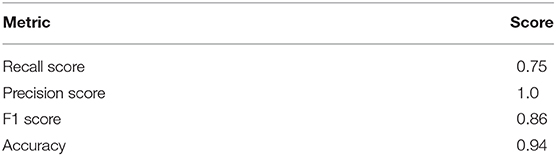



Comparado con nuestro modelo vemos una muy significante mejora versus la propuesta original en literalmente todos los parametros como se muestra a continuación.

* Recall Score:
 * Authors: 0.75
 * ITESM: 0.83
* Precision Score:
 * Authors: 1.0
 * ITESM: 1.0
* F1 Score:
 * Authors: 0.86
 * ITESM: 0.90
* Accuracy:
 * Authors: 0.94
 * ITESM: 0.95


 Conclusión el modelo propuesto tiene un mucho mejor desempeño que el públicado, juzgando por las métricas listadas.